# 树
参天大树充满生命力，根深叶茂，分枝扶疏。

它为我们展现了数据分治的生动形态。

# 二叉树
二叉树（binary tree）是一种非线性数据结构，代表“祖先”与“后代”之间的派生关系，体现了“一分为二”的分治逻辑。与链表类似，二叉树的基本单元是节点，每个节点包含值、左子节点引用和右子节点引用。

In [3]:
// 二叉树节点结构体
type TreeNode struct{
	Val		int
	left    *TreeNode
	right   *TreeNode
}

// 构造方法
func NewTreeNode(v int) *TreeNode{
	return &TreeNode{
		left:	nil, // 左指针
		right:  nil, // 右节点指针
		Val:    v,	 // 节点值
	}
}

每个节点都有两个引用（指针），分别指向左子节点（left-child node）和右子节点（right-child node），该节点被称为这两个子节点的父节点（parent node）。当给定一个二叉树的节点时，我们将该节点的左子节点及其以下节点形成的树称为该节点的左子树（left subtree），同理可得右子树（right subtree）。

**在二叉树中，除叶节点外，其他所有节点都包含子节点和非空子树。**如图 7-1 所示，如果将“节点 2”视为父节点，则其左子节点和右子节点分别是“节点 4”和“节点 5”，左子树是“节点 4 及其以下节点形成的树”，右子树是“节点 5 及其以下节点形成的树”。

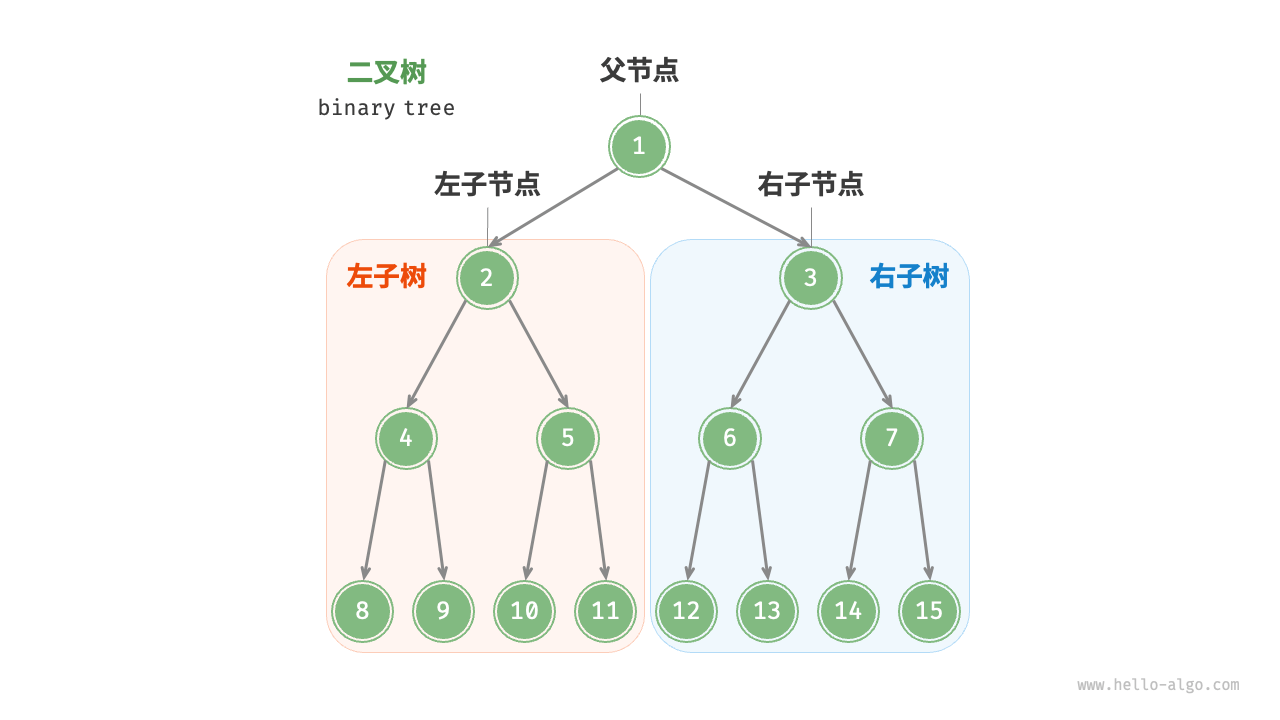
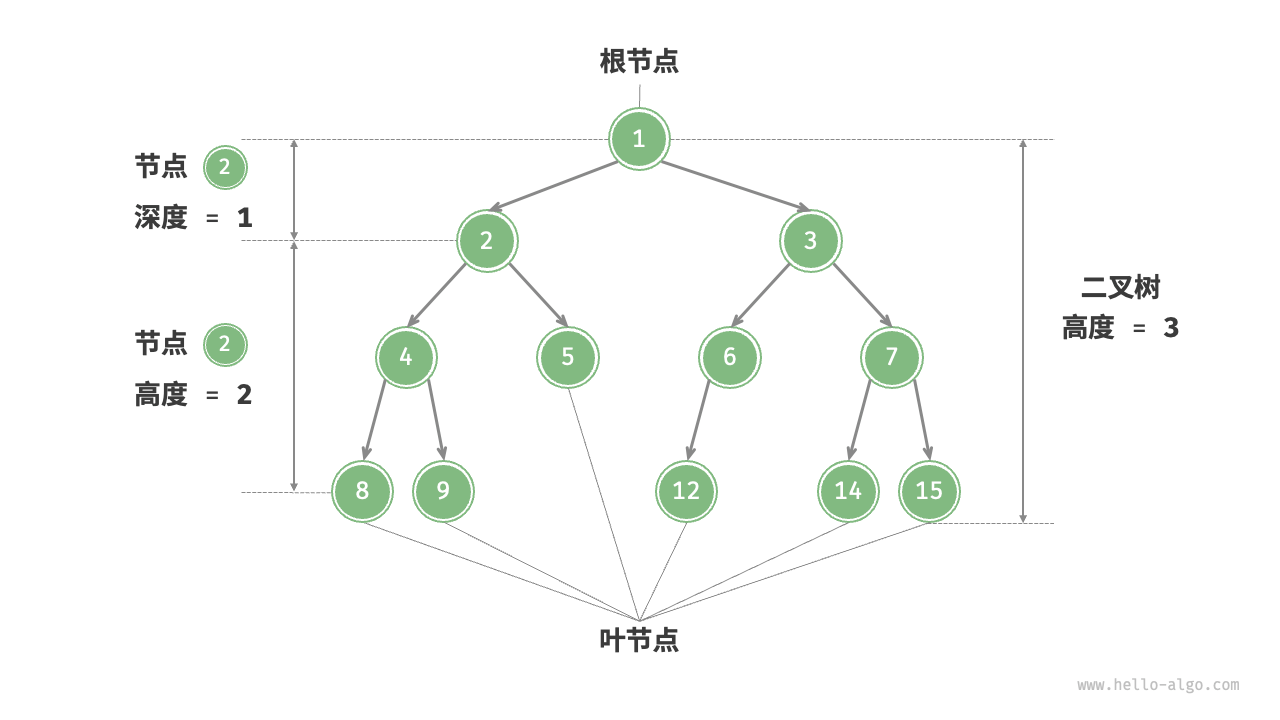

## 二叉树常见术语

二叉树的常用术语如下图所示。

- <u>根节点（root node）</u>：位于二叉树顶层的节点，没有父节点。
- <u>叶节点（leaf node）</u>：没有子节点的节点，其两个指针均指向 `None` 。
- <u>边（edge）</u>：连接两个节点的线段，即节点引用（指针）。
- 节点所在的<u>层（level）</u>：从顶至底递增，根节点所在层为 1 。
- 节点的<u>度（degree）</u>：节点的子节点的数量。在二叉树中，度的取值范围是 0、1、2 。
- 二叉树的<u>高度（height）</u>：从根节点到最远叶节点所经过的边的数量。
- 节点的<u>深度（depth）</u>：从根节点到该节点所经过的边的数量。
- 节点的<u>高度（height）</u>：从距离该节点最远的叶节点到该节点所经过的边的数量。

![二叉树的常用术语](binary_tree.assets/binary_tree_terminology.png)

!!! tip

    请注意，我们通常将“高度”和“深度”定义为“经过的边的数量”，但有些题目或教材可能会将其定义为“经过的节点的数量”。在这种情况下，高度和深度都需要加 1 。

## 二叉树基本操作

### 初始化二叉树
与链表相似，首先初始化节点，然后构建引用（指针）。

In [ ]:
// 初始化节点
n1 := NewTreeNode(1)
n2 := NewTreeNode(2)
n3 := NewTreeNode(3)
n4 := NewTreeNode(4)
n5 := NewTreeNode(5)

// 构建节点之间的指针

n1.left = n2
n1.right = n3
n2.left = n4
n2.right = n5

### 插入与删除节点
与链表类似，在二叉树中插入和删除节点可以通过修改指针来实现。
![在二叉树中插入与删除节点](binary_tree.assets/binary_tree_add_remove.png)

In [ ]:
// 插入与删除节点
p := NewTreeNode(0)
n1.left = p // 在节点1的左子节点位置插入节点0
p.left = n2 // 将节点2作为节点0的左子节点

// 删除节点0
n1.left = n2 // 删除节点0，恢复节点1的左子节点为节点2

!!! tip

    需要注意的是，插入节点可能会改变二叉树的原有逻辑结构，而删除节点通常意味着删除该节点及其所有子树。因此，在二叉树中，插入与删除通常是由一套操作配合完成的，以实现有实际意义的操作。


## 常见二叉树类型

### 完美二叉树

如下图所示，<u>完美二叉树（perfect binary tree）</u>所有层的节点都被完全填满。在完美二叉树中，叶节点的度为 $0$ ，其余所有节点的度都为 $2$ ；若树的高度为 $h$ ，则节点总数为 $2^{h+1} - 1$ ，呈现标准的指数级关系，反映了自然界中常见的细胞分裂现象。

!!! tip

    请注意，在中文社区中，完美二叉树常被称为<u>满二叉树</u>。

![完美二叉树](binary_tree.assets/perfect_binary_tree.png)

### 完全二叉树

如下图所示，<u>完全二叉树（complete binary tree）</u>仅允许最底层的节点不完全填满，**且最底层的节点必须从左至右依次连续填充**。请注意，完美二叉树也是一棵完全二叉树。

![完全二叉树](binary_tree.assets/complete_binary_tree.png)

### 完满二叉树

如下图所示，<u>完满二叉树（full binary tree）</u>除了叶节点之外，其余所有节点都有两个子节点。

![完满二叉树](binary_tree.assets/full_binary_tree.png)

### 平衡二叉树

如下图所示，<u>平衡二叉树（balanced binary tree）</u>中任意节点的左子树和右子树的高度之差的绝对值不超过 1 。

![平衡二叉树](binary_tree.assets/balanced_binary_tree.png)

## 二叉树的退化

下图展示了二叉树的理想结构与退化结构。当二叉树的每层节点都被填满时，达到“完美二叉树”；而当所有节点都偏向一侧时，二叉树退化为“链表”。

- 完美二叉树是理想情况，可以充分发挥二叉树“分治”的优势。
- 链表则是另一个极端，各项操作都变为线性操作，时间复杂度退化至 $O(n)$ 。

![二叉树的最佳结构与最差结构](binary_tree.assets/binary_tree_best_worst_cases.png)

如下表所示，在最佳结构和最差结构下，二叉树的叶节点数量、节点总数、高度等达到极大值或极小值。

<p align="center"> 表 <id> &nbsp; 二叉树的最佳结构与最差结构 </p>

|                             | 完美二叉树         | 链表    |
| --------------------------- | ------------------ | ------- |
| 第 $i$ 层的节点数量         | $2^{i-1}$          | $1$     |
| 高度为 $h$ 的树的叶节点数量 | $2^h$              | $1$     |
| 高度为 $h$ 的树的节点总数   | $2^{h+1} - 1$      | $h + 1$ |
| 节点总数为 $n$ 的树的高度   | $\log_2 (n+1) - 1$ | $n - 1$ |

# 二叉树的遍历
从物理结构的角度来看，树是一种基于链表的数据结构，因此其遍历方式是通过指针逐个访问节点。然而，树是一种非线性数据结构，这使得遍历树比遍历链表更加复杂，需要借助搜索算法来实现。

二叉树常见的遍历方式包括层序遍历、前序遍历、中序遍历和后序遍历等。

## 层序遍历

如下图所示，<u>层序遍历（level-order traversal）</u>从顶部到底部逐层遍历二叉树，并在每一层按照从左到右的顺序访问节点。

层序遍历本质上属于<u>广度优先遍历（breadth-first traversal）</u>，也称<u>广度优先搜索（breadth-first search, BFS）</u>，它体现了一种“一圈一圈向外扩展”的逐层遍历方式。

![二叉树的层序遍历](binary_tree_traversal.assets/binary_tree_bfs.png)

### 代码实现

广度优先遍历通常借助“队列”来实现。队列遵循“先进先出”的规则，而广度优先遍历则遵循“逐层推进”的规则，两者背后的思想是一致的。实现代码如下：

In [ ]:
// 层序遍历
func levelOrder(root *TreeNode) []any {
	// 初始化队列，加入根节点
	queue := list.New()
	queue.PushBack(root)
	// 初始化一个切片，来存储遍历序列
	nums := make([]any, 0)
	for queue.Len() > 0 {
		// 队列出队
		node := queue.Remove(queue.Front()).(*TreeNode)
		// 将节点值加入切片
		nums = append(nums, node.Val)
		// 左子节点入队
		if node.left != nil {
			queue.PushBack(node.left)
		}
		// 右子节点入队
		if node.right != nil {
			queue.PushBack(node.right)
		}
	}
	return nums
}

### 复杂度分析

- **时间复杂度为 $O(n)$** ：所有节点被访问一次，使用 $O(n)$ 时间，其中 $n$ 为节点数量。
- **空间复杂度为 $O(n)$** ：在最差情况下，即满二叉树时，遍历到最底层之前，队列中最多同时存在 $(n + 1) / 2$ 个节点，占用 $O(n)$ 空间。

## 前序、中序、后序遍历

相应地，前序、中序和后序遍历都属于<u>深度优先遍历（depth-first traversal）</u>，也称<u>深度优先搜索（depth-first search, DFS）</u>，它体现了一种“先走到尽头，再回溯继续”的遍历方式。

下图展示了对二叉树进行深度优先遍历的工作原理。**深度优先遍历就像是绕着整棵二叉树的外围“走”一圈**，在每个节点都会遇到三个位置，分别对应前序遍历、中序遍历和后序遍历。 **注意此处的先中后其实是值得根节点的访问顺序而言的**

![二叉搜索树的前序、中序、后序遍历](binary_tree_traversal.assets/binary_tree_dfs.png)

### 代码实现

深度优先搜索通常基于递归实现：

2. 生活版（排队查数）想象你在电影院排队买票，队伍很长，你想知道你是第几个人，但你看不见队头。递归的做法是：（递去） 你拍拍前面那哥们的肩膀问：“你是第几个人？”前面那哥们也不知道，他也拍拍他前面的人：“你是第几个人？”……（终止条件） 这个问题一直传到队伍最第一个人。他前面没人了，他回答：“我是第 1 个。”（归来）第 2 个人听到后，心里想（1+1），回头告诉第 3 个人：“我是第 2 个”。第 3 个人听到后，心里想（2+1），回头告诉第 4 个人：“我是第 3 个”。……最后你前面那哥们告诉你他是第 $N-1$ 个，你心里一加（$N-1+1$），就知道自己是第 $N$ 个了。在这个过程中：问前面的动作 = func(n-1)第一个人回答 = return 1 (Base Case / 终止条件)心里加 1 = 处理逻辑

In [ ]:
// 递归的通俗意思就是“自己调用自己，直到没法再调用了，然后一层层把结果传回来。”递归就是
// 递去 和 归来 的过程。

// 前序遍历
func preOrder(node *TreeNode) {
	if node == nil {
		return
	}
	// 访问根节点
	fmt.Println(node.Val)
	// 遍历左子树
	preOrder(node.left)
	// 遍历右子树
	preOrder(node.right)
}

// 中序遍历
func inOrder(node *TreeNode) {
	if node == nil {
		return
	}
	// 遍历左子树
	inOrder(node.left)
	// 访问根节点
	fmt.Println(node.Val)
	// 遍历右子树
	inOrder(node.right)
}

// 后序遍历
func postOrder(node *TreeNode) {
	if node == nil {
		return
	}
	// 遍历左子树
	postOrder(node.left)
	// 遍历右子树
	postOrder(node.right)
	// 访问根节点
	fmt.Println(node.Val)
}


!!! tip

    深度优先搜索也可以基于迭代实现，有兴趣的读者可以自行研究。

下图展示了前序遍历二叉树的递归过程，其可分为“递”和“归”两个逆向的部分。

1. “递”表示开启新方法，程序在此过程中访问下一个节点。
2. “归”表示函数返回，代表当前节点已经访问完毕。

=== "<1>"
    ![前序遍历的递归过程](binary_tree_traversal.assets/preorder_step1.png)

=== "<2>"
    ![preorder_step2](binary_tree_traversal.assets/preorder_step2.png)

=== "<3>"
    ![preorder_step3](binary_tree_traversal.assets/preorder_step3.png)

=== "<4>"
    ![preorder_step4](binary_tree_traversal.assets/preorder_step4.png)

=== "<5>"
    ![preorder_step5](binary_tree_traversal.assets/preorder_step5.png)

=== "<6>"
    ![preorder_step6](binary_tree_traversal.assets/preorder_step6.png)

=== "<7>"
    ![preorder_step7](binary_tree_traversal.assets/preorder_step7.png)

=== "<8>"
    ![preorder_step8](binary_tree_traversal.assets/preorder_step8.png)

=== "<9>"
    ![preorder_step9](binary_tree_traversal.assets/preorder_step9.png)

=== "<10>"
    ![preorder_step10](binary_tree_traversal.assets/preorder_step10.png)

=== "<11>"
    ![preorder_step11](binary_tree_traversal.assets/preorder_step11.png)

### 复杂度分析

- **时间复杂度为 $O(n)$** ：所有节点被访问一次，使用 $O(n)$ 时间。
- **空间复杂度为 $O(n)$** ：在最差情况下，即树退化为链表时，递归深度达到 $n$ ，系统占用 $O(n)$ 栈帧空间。

# 二叉树数组表示

在链表表示下，二叉树的存储单元为节点 `TreeNode` ，节点之间通过指针相连接。上一节介绍了链表表示下的二叉树的各项基本操作。

那么，我们能否用数组来表示二叉树呢？答案是肯定的。

## 表示完美二叉树

先分析一个简单案例。给定一棵完美二叉树，我们将所有节点按照层序遍历的顺序存储在一个数组中，则每个节点都对应唯一的数组索引。

根据层序遍历的特性，我们可以推导出父节点索引与子节点索引之间的“映射公式”：**若某节点的索引为 $i$ ，则该节点的左子节点索引为 $2i + 1$ ，右子节点索引为 $2i + 2$** 。下图展示了各个节点索引之间的映射关系。

![完美二叉树的数组表示](array_representation_of_tree.assets/array_representation_binary_tree.png)

**映射公式的角色相当于链表中的节点引用（指针）**。给定数组中的任意一个节点，我们都可以通过映射公式来访问它的左（右）子节点。

## 表示任意二叉树

完美二叉树是一个特例，在二叉树的中间层**通常**存在许多 `None` 。由于层序遍历序列并不包含这些 `None` ，因此我们无法仅凭该序列来推测 `None` 的数量和分布位置。**这意味着存在多种二叉树结构都符合该层序遍历序列**。

如下图所示，给定一棵非完美二叉树，上述数组表示方法已经失效。

![层序遍历序列对应多种二叉树可能性](array_representation_of_tree.assets/array_representation_without_empty.png)

为了解决此问题，**我们可以考虑在层序遍历序列中显式地写出所有 `None`** 。如下图所示，这样处理后，层序遍历序列就可以唯一表示二叉树了。示例代码如下：

In [ ]:
/* 二叉树的数组表示 */
// 使用 any 类型的切片, 就可以使用 nil 来标记空位
tree := []any{1, 2, 3, 4, nil, 6, 7, 8, 9, nil, nil, 12, nil, nil, 15}

![任意类型二叉树的数组表示](array_representation_of_tree.assets/array_representation_with_empty.png)

值得说明的是，**完全二叉树非常适合使用数组来表示**。回顾完全二叉树的定义，`None` 只出现在最底层且靠右的位置，**因此所有 `None` 一定出现在层序遍历序列的末尾**。

这意味着使用数组表示完全二叉树时，可以省略存储所有 `None` ，非常方便。下图给出了一个例子。

![完全二叉树的数组表示](array_representation_of_tree.assets/array_representation_complete_binary_tree.png)

以下代码实现了一棵基于数组表示的二叉树，包括以下几种操作。

- 给定某节点，获取它的值、左（右）子节点、父节点。
- 获取前序遍历、中序遍历、后序遍历、层序遍历序列。

In [ ]:
// 数组表示下的二叉树类
type arrayBinaryTree struct {
	tree []any
}

// 构造方法
func newArrayBinaryTree(arr []any) *arrayBinaryTree {
	return &arrayBinaryTree{
		tree: arr,
	}
}

// 列表容量
func (abt *arrayBinaryTree) size() int {
	return len(abt.tree)
}

// 获取指定索引的节点值
func (abt *arrayBinaryTree) get(index int) any {
	if index < 0 || index >= len(abt.tree) {
		return nil
	}
	return abt.tree[index]
}

// 获取指定索引节点的左子节点值
func (abt *arrayBinaryTree) leftChild(index int) any {
	return abt.get(2*index + 1)
}

// 获取指定索引节点的右子节点值
func (abt *arrayBinaryTree) rightChild(index int) any {
	return abt.get(2*index + 2)
}

// 获取指定索引节点的父节点值
func (abt *arrayBinaryTree) parent(index int) any {
	if index == 0 {
		return nil // 根节点没有父节点
	}
	return abt.get((index - 1) / 2)
}

// 层序遍历
func (abt *arrayBinaryTree) levelOrder() []any {
	return abt.tree
}

// 深度优先遍历
func (abt *arrayBinaryTree) dfs(i int, order string, res *[]any) {
    // 若为空位，则返回
    if abt.val(i) == nil {
        return
    }
    // 前序遍历
    if order == "pre" {
        *res = append(*res, abt.val(i))
    }
    abt.dfs(abt.left(i), order, res)
    // 中序遍历
    if order == "in" {
        *res = append(*res, abt.val(i))
    }
    abt.dfs(abt.right(i), order, res)
    // 后序遍历
    if order == "post" {
        *res = append(*res, abt.val(i))
    }
}

/* 前序遍历 */
func (abt *arrayBinaryTree) preOrder() []any {
    var res []any
    abt.dfs(0, "pre", &res)
    return res
}

/* 中序遍历 */
func (abt *arrayBinaryTree) inOrder() []any {
    var res []any
    abt.dfs(0, "in", &res)
    return res
}

/* 后序遍历 */
func (abt *arrayBinaryTree) postOrder() []any {
    var res []any
    abt.dfs(0, "post", &res)
    return res
}

## 优点与局限性

二叉树的数组表示主要有以下优点。

- 数组存储在连续的内存空间中，对缓存友好，访问与遍历速度较快。
- 不需要存储指针，比较节省空间。
- 允许随机访问节点。

然而，数组表示也存在一些局限性。

- 数组存储需要连续内存空间，因此不适合存储数据量过大的树。
- 增删节点需要通过数组插入与删除操作实现，效率较低。
- 当二叉树中存在大量 `None` 时，数组中包含的节点数据比重较低，空间利用率较低。

# 二叉搜索树

如下图所示，<u>二叉搜索树（binary search tree）</u>满足以下条件。

1. 对于根节点，左子树中所有节点的值 $<$ 根节点的值 $<$ 右子树中所有节点的值。
2. 任意节点的左、右子树也是二叉搜索树，即同样满足条件 `1.` 。

![二叉搜索树](binary_search_tree.assets/binary_search_tree.png)

## 二叉搜索树的操作

我们将二叉搜索树封装为一个类 `BinarySearchTree` ，并声明一个成员变量 `root` ，指向树的根节点。

### 查找节点

给定目标节点值 `num` ，可以根据二叉搜索树的性质来查找。如下图所示，我们声明一个节点 `cur` ，从二叉树的根节点 `root` 出发，循环比较节点值 `cur.val` 和 `num` 之间的大小关系。

- 若 `cur.val < num` ，说明目标节点在 `cur` 的右子树中，因此执行 `cur = cur.right` 。
- 若 `cur.val > num` ，说明目标节点在 `cur` 的左子树中，因此执行 `cur = cur.left` 。
- 若 `cur.val = num` ，说明找到目标节点，跳出循环并返回该节点。

=== "<1>"
    ![二叉搜索树查找节点示例](binary_search_tree.assets/bst_search_step1.png)

=== "<2>"
    ![bst_search_step2](binary_search_tree.assets/bst_search_step2.png)

=== "<3>"
    ![bst_search_step3](binary_search_tree.assets/bst_search_step3.png)

=== "<4>"
    ![bst_search_step4](binary_search_tree.assets/bst_search_step4.png)

二叉搜索树的查找操作与二分查找算法的工作原理一致，都是每轮排除一半情况。循环次数最多为二叉树的高度，当二叉树平衡时，使用 $O(\log n)$ 时间。示例代码如下：

In [ ]:
// 查找节点
func(bst *binarysearchTree) search(val int) *TreeNode {
	current := bst.root
	for current != nil{
		if val == current.Val.(int) {
			return current
		}else if val < current.Val.(int) {
			current = current.left
		}else{
			current = current.right
		}
	}
	return nil
}

### 插入节点

给定一个待插入元素 `num` ，为了保持二叉搜索树“左子树 < 根节点 < 右子树”的性质，插入操作流程如下图所示。

1. **查找插入位置**：与查找操作相似，从根节点出发，根据当前节点值和 `num` 的大小关系循环向下搜索，直到越过叶节点（遍历至 `None` ）时跳出循环。
2. **在该位置插入节点**：初始化节点 `num` ，将该节点置于 `None` 的位置。

![在二叉搜索树中插入节点](binary_search_tree.assets/bst_insert.png)

在代码实现中，需要注意以下两点。

- 二叉搜索树不允许存在重复节点，否则将违反其定义。因此，若待插入节点在树中已存在，则不执行插入，直接返回。
- 为了实现插入节点，我们需要借助节点 `pre` 保存上一轮循环的节点。这样在遍历至 `None` 时，我们可以获取到其父节点，从而完成节点插入操作。


In [ ]:
// 插入节点
func (bst *binarysearchtree) insert(num int){
	cur := bst.root
	// 若树为空，则插入为根节点
	if cur == nil {
		bst.root = NewTreeNode(num)
		return
	}
	// 待插入节点之前的节点位置
	var pre *TreeNode = nil
	// 循环查找，越过叶节点后跳出
	for cur != nil {
		if num == cur.Val {
			return // 不允许插入重复节点
		}
		pre = cur
		if num < cur.Val {
			cur = cur.left
		} else {
			cur = cur.right
		}
	}
	// 插入节点 此处这个pre就是待插入节点的父节点
	newNode := NewTreeNode(num)
	if num < pre.Val {
		pre.left = newNode
	} else {
		pre.right = newNode
	}
}

与查找节点相同，插入节点使用 $O(\log n)$ 时间。

### 删除节点

先在二叉树中查找到目标节点，再将其删除。与插入节点类似，我们需要保证在删除操作完成后，二叉搜索树的“左子树 < 根节点 < 右子树”的性质仍然满足。因此，我们根据目标节点的子节点数量，分 0、1 和 2 三种情况，执行对应的删除节点操作。

如下图所示，当待删除节点的度为 $0$ 时，表示该节点是叶节点，可以直接删除。

![在二叉搜索树中删除节点（度为 0 ）](binary_search_tree.assets/bst_remove_case1.png)

如下图所示，当待删除节点的度为 $1$ 时，将待删除节点替换为其子节点即可。

![在二叉搜索树中删除节点（度为 1 ）](binary_search_tree.assets/bst_remove_case2.png)

当待删除节点的度为 $2$ 时，我们无法直接删除它，而需要使用一个节点替换该节点。由于要保持二叉搜索树“左子树 $<$ 根节点 $<$ 右子树”的性质，**因此这个节点可以是右子树的最小节点或左子树的最大节点**。

假设我们选择右子树的最小节点（中序遍历的下一个节点），则删除操作流程如下图所示。

1. 找到待删除节点在“中序遍历序列”中的下一个节点，记为 `tmp` 。
2. 用 `tmp` 的值覆盖待删除节点的值，并在树中递归删除节点 `tmp` 。

=== "<1>"
    ![在二叉搜索树中删除节点（度为 2 ）](binary_search_tree.assets/bst_remove_case3_step1.png)

=== "<2>"
    ![bst_remove_case3_step2](binary_search_tree.assets/bst_remove_case3_step2.png)

=== "<3>"
    ![bst_remove_case3_step3](binary_search_tree.assets/bst_remove_case3_step3.png)

=== "<4>"
    ![bst_remove_case3_step4](binary_search_tree.assets/bst_remove_case3_step4.png)

删除节点操作同样使用 $O(\log n)$ 时间，其中查找待删除节点需要 $O(\log n)$ 时间，获取中序遍历后继节点需要 $O(\log n)$ 时间。示例代码如下：

In [ ]:
/* 删除节点 */
func (bst *binarySearchTree) remove(num int) {
    cur := bst.root
    // 若树为空，直接提前返回
    if cur == nil {
        return
    }
    // 待删除节点之前的节点位置
    var pre *TreeNode = nil
    // 循环查找，越过叶节点后跳出
    for cur != nil {
        if cur.Val == num {
            break
        }
        pre = cur
        if cur.Val.(int) < num {
            // 待删除节点在右子树中
            cur = cur.Right
        } else {
            // 待删除节点在左子树中
            cur = cur.Left
        }
    }
    // 若无待删除节点，则直接返回
    if cur == nil {
        return
    }
    // 子节点数为 0 或 1
    if cur.Left == nil || cur.Right == nil {
        var child *TreeNode = nil
        // 取出待删除节点的子节点
        if cur.Left != nil {
            child = cur.Left
        } else {
            child = cur.Right
        }
        // 删除节点 cur
        if cur != bst.root {
            if pre.Left == cur {
                pre.Left = child
            } else {
                pre.Right = child
            }
        } else {
            // 若删除节点为根节点，则重新指定根节点
            bst.root = child
        }
        // 子节点数为 2
    } else {
        // 获取中序遍历中待删除节点 cur 的下一个节点
        tmp := cur.Right
        for tmp.Left != nil {
            tmp = tmp.Left
        }
        // 递归删除节点 tmp
        bst.remove(tmp.Val.(int))
        // 用 tmp 覆盖 cur
        cur.Val = tmp.Val
    }
}

### 中序遍历有序

如下图所示，二叉树的中序遍历遵循“左 $\rightarrow$ 根 $\rightarrow$ 右”的遍历顺序，而二叉搜索树满足“左子节点 $<$ 根节点 $<$ 右子节点”的大小关系。

这意味着在二叉搜索树中进行中序遍历时，总是会优先遍历下一个最小节点，从而得出一个重要性质：**二叉搜索树的中序遍历序列是升序的**。

利用中序遍历升序的性质，我们在二叉搜索树中获取有序数据仅需 $O(n)$ 时间，无须进行额外的排序操作，非常高效。

![二叉搜索树的中序遍历序列](binary_search_tree.assets/bst_inorder_traversal.png)

## 二叉搜索树的效率

给定一组数据，我们考虑使用数组或二叉搜索树存储。观察下表，二叉搜索树的各项操作的时间复杂度都是对数阶，具有稳定且高效的性能。只有在高频添加、低频查找删除数据的场景下，数组比二叉搜索树的效率更高。

<p align="center"> 表 <id> &nbsp; 数组与搜索树的效率对比 </p>

|          | 无序数组 | 二叉搜索树  |
| -------- | -------- | ----------- |
| 查找元素 | $O(n)$   | $O(\log n)$ |
| 插入元素 | $O(1)$   | $O(\log n)$ |
| 删除元素 | $O(n)$   | $O(\log n)$ |

在理想情况下，二叉搜索树是“平衡”的，这样就可以在 $\log n$ 轮循环内查找任意节点。

然而，如果我们在二叉搜索树中不断地插入和删除节点，可能导致二叉树退化为下图所示的链表，这时各种操作的时间复杂度也会退化为 $O(n)$ 。

![二叉搜索树退化](binary_search_tree.assets/bst_degradation.png)

## 二叉搜索树常见应用

- 用作系统中的多级索引，实现高效的查找、插入、删除操作。
- 作为某些搜索算法的底层数据结构。
- 用于存储数据流，以保持其有序状态。

# AVL树*
在“二叉搜索树”章节中我们提到，在多次插入和删除操作后，二叉搜索树可能退化为链表。在这种情况下，所有操作的时间复杂度将从 $O(\log n)$ 劣化为 $O(n)$ 。

如下图所示，经过两次删除节点操作，这棵二叉搜索树便会退化为链表。

![AVL 树在删除节点后发生退化](avl_tree.assets/avltree_degradation_from_removing_node.png)

再例如，在下图所示的完美二叉树中插入两个节点后，树将严重向左倾斜，查找操作的时间复杂度也随之劣化。

![AVL 树在插入节点后发生退化](avl_tree.assets/avltree_degradation_from_inserting_node.png)

1962 年 G. M. Adelson-Velsky 和 E. M. Landis 在论文“An algorithm for the organization of information”中提出了 <u>AVL 树</u>。论文中详细描述了一系列操作，确保在持续添加和删除节点后，AVL 树不会退化，从而使得各种操作的时间复杂度保持在 $O(\log n)$ 级别。换句话说，在需要频繁进行增删查改操作的场景中，AVL 树能始终保持高效的数据操作性能，具有很好的应用价值。

## AVL 树常见术语

AVL 树既是二叉搜索树，也是平衡二叉树，同时满足这两类二叉树的所有性质，因此是一种<u>平衡二叉搜索树（balanced binary search tree）</u>。

### 节点高度

由于 AVL 树的相关操作需要获取节点高度，因此我们需要为节点类添加 `height` 变量：


In [1]:
// AVL树节点结构体
type TreeNode struct{
	Val		int
	left    *TreeNode
	right   *TreeNode
	height  int // 节点高度
}

“节点高度”是指从该节点到它的最远叶节点的距离，即所经过的“边”的数量。需要特别注意的是，叶节点的高度为 $0$ ，而空节点的高度为 $-1$ 。我们将创建两个工具函数，分别用于获取和更新节点的高度：注意空节点是叶节点的子节点，其高度定义为 -1 。

In [ ]:
// 获取节点高度
func (t *aVLTree) height(node *TreeNode) int{ //此处的aVLTree为接收者，表示这是aVLTree类型的方法
	// 空节点高度为-1，叶节点高度为0
	if node != nil {
		return node.height
	}
	return -1
}

// 更新节点高度
func (t *aVLTree) updateHeight(node *TreeNode){
	lh := t.height(node.left)
	rh := t.height(node.right)
	if lh > rh {
		node.height = lh + 1
	}else{
		node.height = rh + 1
	}
} 

### 节点平衡因子

节点的<u>平衡因子（balance factor）</u>定义为节点左子树的高度减去右子树的高度，同时规定空节点的平衡因子为 $0$ 。我们同样将获取节点平衡因子的功能封装成函数，方便后续使用：


In [ ]:
// 获取平衡因子
func (t *aVLTree) balanceFactor(node *TreeNode) int {
	if node == nil {
		return 0
	}
	return t.height(node.left) - t.height(node.right)
}


设平衡因子为 $f$ ，则一棵 AVL 树的任意节点的平衡因子皆满足 $-1 \le f \le 1$ 。

## AVL 树旋转

AVL 树的特点在于“旋转”操作，它能够在不影响二叉树的中序遍历序列的前提下，使失衡节点重新恢复平衡。换句话说，**旋转操作既能保持“二叉搜索树”的性质，也能使树重新变为“平衡二叉树”**。

我们将平衡因子绝对值 $> 1$ 的节点称为“失衡节点”。根据节点失衡情况的不同，旋转操作分为四种：右旋、左旋、先右旋后左旋、先左旋后右旋。下面详细介绍这些旋转操作。

### 右旋

如下图所示，节点下方为平衡因子。从底至顶看，二叉树中首个失衡节点是“节点 3”。我们关注以该失衡节点为根节点的子树，将该节点记为 `node` ，其左子节点记为 `child` ，执行“右旋”操作。完成右旋后，子树恢复平衡，并且仍然保持二叉搜索树的性质。

=== "<1>"
    ![右旋操作步骤](avl_tree.assets/avltree_right_rotate_step1.png)

=== "<2>"
    ![avltree_right_rotate_step2](avl_tree.assets/avltree_right_rotate_step2.png)

=== "<3>"
    ![avltree_right_rotate_step3](avl_tree.assets/avltree_right_rotate_step3.png)

=== "<4>"
    ![avltree_right_rotate_step4](avl_tree.assets/avltree_right_rotate_step4.png)

如下图所示，当节点 `child` 有右子节点（记为 `grand_child` ）时，需要在右旋中添加一步：将 `grand_child` 作为 `node` 的左子节点。

![有 grand_child 的右旋操作](avl_tree.assets/avltree_right_rotate_with_grandchild.png)

“向右旋转”是一种形象化的说法，实际上需要通过修改节点指针来实现，代码如下所示：


In [ ]:
// 右旋操作
func (t *aVLTree) rightRotate(node *TreeNode) *TreeNode {
	child := node.left
	grandChild := child.right
	// 以child为原点，将node向右旋转
	chilfd.right = node
	node.left = grandChild
	// 更新节点高度
	t.updateHeight(node)
	t.updateHeight(child)
	return child
}

### 左旋

相应地，如果考虑上述失衡二叉树的“镜像”，则需要执行下图所示的“左旋”操作。

![左旋操作](avl_tree.assets/avltree_left_rotate.png)

同理，如下图所示，当节点 `child` 有左子节点（记为 `grand_child` ）时，需要在左旋中添加一步：将 `grand_child` 作为 `node` 的右子节点。

![有 grand_child 的左旋操作](avl_tree.assets/avltree_left_rotate_with_grandchild.png)

可以观察到，**右旋和左旋操作在逻辑上是镜像对称的，它们分别解决的两种失衡情况也是对称的**。基于对称性，我们只需将右旋的实现代码中的所有的 `left` 替换为 `right` ，将所有的 `right` 替换为 `left` ，即可得到左旋的实现代码：

In [ ]:
/* 左旋操作 */
func (t *aVLTree) leftRotate(node *TreeNode) *TreeNode {
    child := node.Right
    grandChild := child.Left
    // 以 child 为原点，将 node 向左旋转
    child.Left = node
    node.Right = grandChild
    // 更新节点高度
    t.updateHeight(node)
    t.updateHeight(child)
    // 返回旋转后子树的根节点
    return child
}

### 先左旋后右旋

对于下图中的失衡节点 3 ，仅使用左旋或右旋都无法使子树恢复平衡。此时需要先对 `child` 执行“左旋”，再对 `node` 执行“右旋”。

![先左旋后右旋](avl_tree.assets/avltree_left_right_rotate.png)

### 先右旋后左旋

如下图所示，对于上述失衡二叉树的镜像情况，需要先对 `child` 执行“右旋”，再对 `node` 执行“左旋”。

![先右旋后左旋](avl_tree.assets/avltree_right_left_rotate.png)

### 旋转的选择

下图展示的四种失衡情况与上述案例逐个对应，分别需要采用右旋、先左旋后右旋、先右旋后左旋、左旋的操作。

![AVL 树的四种旋转情况](avl_tree.assets/avltree_rotation_cases.png)

如下表所示，我们通过判断失衡节点的平衡因子以及较高一侧子节点的平衡因子的正负号，来确定失衡节点属于上图中的哪种情况。

<p align="center"> 表 <id> &nbsp; 四种旋转情况的选择条件 </p>

| 失衡节点的平衡因子 | 子节点的平衡因子 | 应采用的旋转方法 |
| ------------------ | ---------------- | ---------------- |
| $> 1$ （左偏树）   | $\geq 0$         | 右旋             |
| $> 1$ （左偏树）   | $<0$             | 先左旋后右旋     |
| $< -1$ （右偏树）  | $\leq 0$         | 左旋             |
| $< -1$ （右偏树）  | $>0$             | 先右旋后左旋     |

为了便于使用，我们将旋转操作封装成一个函数。**有了这个函数，我们就能对各种失衡情况进行旋转，使失衡节点重新恢复平衡**。代码如下所示：

In [ ]:
/* 执行旋转操作，使该子树重新恢复平衡 */
func (t *aVLTree) rotate(node *TreeNode) *TreeNode {
    // 获取节点 node 的平衡因子
    // Go 推荐短变量，这里 bf 指代 t.balanceFactor
    bf := t.balanceFactor(node)
    // 左偏树
    if bf > 1 {
        if t.balanceFactor(node.Left) >= 0 {
            // 右旋
            return t.rightRotate(node)
        } else {
            // 先左旋后右旋
            node.Left = t.leftRotate(node.Left)
            return t.rightRotate(node)
        }
    }
    // 右偏树
    if bf < -1 {
        if t.balanceFactor(node.Right) <= 0 {
            // 左旋
            return t.leftRotate(node)
        } else {
            // 先右旋后左旋
            node.Right = t.rightRotate(node.Right)
            return t.leftRotate(node)
        }
    }
    // 平衡树，无须旋转，直接返回
    return node
}

## AVL 树常用操作

### 插入节点

AVL 树的节点插入操作与二叉搜索树在主体上类似。唯一的区别在于，在 AVL 树中插入节点后，从该节点到根节点的路径上可能会出现一系列失衡节点。因此，**我们需要从这个节点开始，自底向上执行旋转操作，使所有失衡节点恢复平衡**。代码如下所示：

In [ ]:
/* 插入节点 */

// 包装函数入口
func (t *aVLTree) insert(val int) {
    t.root = t.insertHelper(t.root, val)
}

/* 递归插入节点（辅助函数） */
func (t *aVLTree) insertHelper(node *TreeNode, val int) *TreeNode {
    if node == nil {
        return NewTreeNode(val)
    }
    /* 1. 查找插入位置并插入节点 */
    if val < node.Val.(int) {
        node.Left = t.insertHelper(node.Left, val)
    } else if val > node.Val.(int) {
        node.Right = t.insertHelper(node.Right, val)
    } else {
        // 重复节点不插入，直接返回
        return node
    }
    // 更新节点高度
    t.updateHeight(node)
    /* 2. 执行旋转操作，使该子树重新恢复平衡 */
    node = t.rotate(node)
    // 返回子树的根节点
    return node
}

### 删除节点

类似地，在二叉搜索树的删除节点方法的基础上，需要从底至顶执行旋转操作，使所有失衡节点恢复平衡。代码如下所示：


In [ ]:
/* 删除节点 */
func (t *aVLTree) remove(val int) {
    t.root = t.removeHelper(t.root, val)
}

/* 递归删除节点（辅助函数） */
func (t *aVLTree) removeHelper(node *TreeNode, val int) *TreeNode {
    if node == nil {
        return nil
    }
    /* 1. 查找节点并删除 */
    if val < node.Val.(int) {
        node.Left = t.removeHelper(node.Left, val)
    } else if val > node.Val.(int) {
        node.Right = t.removeHelper(node.Right, val)
    } else {
        if node.Left == nil || node.Right == nil {
            child := node.Left
            if node.Right != nil {
                child = node.Right
            }
            if child == nil {
                // 子节点数量 = 0 ，直接删除 node 并返回
                return nil
            } else {
                // 子节点数量 = 1 ，直接删除 node
                node = child
            }
        } else {
            // 子节点数量 = 2 ，则将中序遍历的下个节点删除，并用该节点替换当前节点
            temp := node.Right
            for temp.Left != nil {
                temp = temp.Left
            }
            node.Right = t.removeHelper(node.Right, temp.Val.(int))
            node.Val = temp.Val
        }
    }
    // 更新节点高度
    t.updateHeight(node)
    /* 2. 执行旋转操作，使该子树重新恢复平衡 */
    node = t.rotate(node)
    // 返回子树的根节点
    return node
}

### 查找节点

AVL 树的节点查找操作与二叉搜索树一致，在此不再赘述。

## AVL 树典型应用

- 组织和存储大型数据，适用于高频查找、低频增删的场景。
- 用于构建数据库中的索引系统。
- 红黑树也是一种常见的平衡二叉搜索树。相较于 AVL 树，红黑树的平衡条件更宽松，插入与删除节点所需的旋转操作更少，节点增删操作的平均效率更高。

# 小结

### 重点回顾

- 二叉树是一种非线性数据结构，体现“一分为二”的分治逻辑。每个二叉树节点包含一个值以及两个指针，分别指向其左子节点和右子节点。
- 对于二叉树中的某个节点，其左（右）子节点及其以下形成的树被称为该节点的左（右）子树。
- 二叉树的相关术语包括根节点、叶节点、层、度、边、高度和深度等。
- 二叉树的初始化、节点插入和节点删除操作与链表操作方法类似。
- 常见的二叉树类型有完美二叉树、完全二叉树、完满二叉树和平衡二叉树。完美二叉树是最理想的状态，而链表是退化后的最差状态。
- 二叉树可以用数组表示，方法是将节点值和空位按层序遍历顺序排列，并根据父节点与子节点之间的索引映射关系来实现指针。
- 二叉树的层序遍历是一种广度优先搜索方法，它体现了“一圈一圈向外扩展”的逐层遍历方式，通常通过队列来实现。
- 前序、中序、后序遍历皆属于深度优先搜索，它们体现了“先走到尽头，再回溯继续”的遍历方式，通常使用递归来实现。
- 二叉搜索树是一种高效的元素查找数据结构，其查找、插入和删除操作的时间复杂度均为 $O(\log n)$ 。当二叉搜索树退化为链表时，各项时间复杂度会劣化至 $O(n)$ 。
- AVL 树，也称平衡二叉搜索树，它通过旋转操作确保在不断插入和删除节点后树仍然保持平衡。
- AVL 树的旋转操作包括右旋、左旋、先右旋再左旋、先左旋再右旋。在插入或删除节点后，AVL 树会从底向顶执行旋转操作，使树重新恢复平衡。

### Q & A

**Q**：对于只有一个节点的二叉树，树的高度和根节点的深度都是 $0$ 吗？

是的，因为高度和深度通常定义为“经过的边的数量”。

**Q**：二叉树中的插入与删除一般由一套操作配合完成，这里的“一套操作”指什么呢？可以理解为资源的子节点的资源释放吗？

拿二叉搜索树来举例，删除节点操作要分三种情况处理，其中每种情况都需要进行多个步骤的节点操作。

**Q**：为什么 DFS 遍历二叉树有前、中、后三种顺序，分别有什么用呢？

与顺序和逆序遍历数组类似，前序、中序、后序遍历是三种二叉树遍历方法，我们可以使用它们得到一个特定顺序的遍历结果。例如在二叉搜索树中，由于节点大小满足 `左子节点值 < 根节点值 < 右子节点值` ，因此我们只要按照“左 $\rightarrow$ 根 $\rightarrow$ 右”的优先级遍历树，就可以获得有序的节点序列。

**Q**：右旋操作是处理失衡节点 `node`、`child`、`grand_child` 之间的关系，那 `node` 的父节点和 `node` 原来的连接不需要维护吗？右旋操作后岂不是断掉了？

我们需要从递归的视角来看这个问题。右旋操作 `right_rotate(root)` 传入的是子树的根节点，最终 `return child` 返回旋转之后的子树的根节点。子树的根节点和其父节点的连接是在该函数返回后完成的，不属于右旋操作的维护范围。

**Q**：在 C++ 中，函数被划分到 `private` 和 `public` 中，这方面有什么考量吗？为什么要将 `height()` 函数和 `updateHeight()` 函数分别放在 `public` 和 `private` 中呢？

主要看方法的使用范围，如果方法只在类内部使用，那么就设计为 `private` 。例如，用户单独调用 `updateHeight()` 是没有意义的，它只是插入、删除操作中的一步。而 `height()` 是访问节点高度，类似于 `vector.size()` ，因此设置成 `public` 以便使用。

**Q**：如何从一组输入数据构建一棵二叉搜索树？根节点的选择是不是很重要？

是的，构建树的方法已在二叉搜索树代码中的 `build_tree()` 方法中给出。至于根节点的选择，我们通常会将输入数据排序，然后将中点元素作为根节点，再递归地构建左右子树。这样做可以最大程度保证树的平衡性。

**Q**：在 Java 中，字符串对比是否一定要用 `equals()` 方法？

在 Java 中，对于基本数据类型，`==` 用于对比两个变量的值是否相等。对于引用类型，两种符号的工作原理是不同的。

- `==` ：用来比较两个变量是否指向同一个对象，即它们在内存中的位置是否相同。
- `equals()`：用来对比两个对象的值是否相等。

因此，如果要对比值，我们应该使用 `equals()` 。然而，通过 `String a = "hi"; String b = "hi";` 初始化的字符串都存储在字符串常量池中，它们指向同一个对象，因此也可以用 `a == b` 来比较两个字符串的内容。

**Q**：广度优先遍历到最底层之前，队列中的节点数量是 $2^h$ 吗？

是的，例如高度 $h = 2$ 的满二叉树，其节点总数 $n = 7$ ，则底层节点数量 $4 = 2^h = (n + 1) / 2$ 。